In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from dateutil import parser
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
Auck_peds = pd.read_csv('data_weather/Final/Auckland_Pedestrian_Hourly.csv')
Dub_peds = pd.read_csv('data_weather/Final/Dublin_Pedestrian_Hourly.csv')
display(Auck_peds.head(1))
display(Dub_peds.head(1))

df = pd.concat([Auck_peds,Dub_peds],ignore_index=True,axis='index')
df['Date'] = df['Date'].apply(lambda x: parser.parse(x))

display(df.head(2))
display(df.tail(2))

,Country,City,Location_ID,Location_Name,Type_of_Attraction,Attraction_Category,Latitude,Longitude,Date,Avg_Daily_Pedestrian_Count,Holiday,Weather_Temperature_Avg,Weather_Wind_Speed_Avg,Weather_Precipitation_Sum,Weather_Relative_Humidity_Avg
0,New Zealand,Auckland,NZAUK_3,Mount Eden (Maungawhau),Volcanic Cone,Nature & Outdoor,-36.8793,174.7656,2021-03-23,23880.0,0.0,16.736584,7.487225,0.0,66.083336


,Country,City,Location_ID,Location_Name,Type_of_Attraction,Attraction_Category,Latitude,Longitude,Date,Avg_Daily_Pedestrian_Count,Holiday,Weather_Temperature_Avg,Weather_Wind_Speed_Avg,Weather_Precipitation_Sum,Weather_Relative_Humidity_Avg
0,Ireland,Dublin,IRDUB_3,St Stephen’s Green,Park,Nature & Outdoor,53.3382,-6.2591,2021-01-01,47847.0,1.0,2.040917,10.893682,0.0,93.08753


,Country,City,Location_ID,Location_Name,Type_of_Attraction,Attraction_Category,Latitude,Longitude,Date,Avg_Daily_Pedestrian_Count,Holiday,Weather_Temperature_Avg,Weather_Wind_Speed_Avg,Weather_Precipitation_Sum,Weather_Relative_Humidity_Avg
0,New Zealand,Auckland,NZAUK_3,Mount Eden (Maungawhau),Volcanic Cone,Nature & Outdoor,-36.8793,174.7656,2021-03-23,23880.0,0.0,16.736584,7.487225,0.0,66.083336
1,New Zealand,Auckland,NZAUK_3,Mount Eden (Maungawhau),Volcanic Cone,Nature & Outdoor,-36.8793,174.7656,2021-03-24,25336.0,0.0,16.897001,7.100323,0.0,70.208336


,Country,City,Location_ID,Location_Name,Type_of_Attraction,Attraction_Category,Latitude,Longitude,Date,Avg_Daily_Pedestrian_Count,Holiday,Weather_Temperature_Avg,Weather_Wind_Speed_Avg,Weather_Precipitation_Sum,Weather_Relative_Humidity_Avg
16343,Ireland,Dublin,IRDUB_4,Temple Bar District,Entertainment District,Urban & Leisure,53.3457,-6.2665,2025-11-04,236487.0,0.0,14.722248,8.13,22.4,91.208336
16344,Ireland,Dublin,IRDUB_4,Temple Bar District,Entertainment District,Urban & Leisure,53.3457,-6.2665,2025-11-05,150056.0,0.0,15.226415,9.03,7.8,89.625000


In [25]:
# Encode categorical columns (except target)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != 'Location_ID':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Encode target variable
le_target = LabelEncoder()
df['Location_ID'] = le_target.fit_transform(df['Location_ID'])

df['Month_Sin'] = np.sin(2 * np.pi * df['Date'].dt.month / 12)
df['Month_Cos'] = np.cos(2 * np.pi * df['Date'].dt.month / 12)
df['Day_Sin']   = np.sin(2 * np.pi * df['Date'].dt.dayofweek / 7)
df['Day_Cos']   = np.cos(2 * np.pi * df['Date'].dt.dayofweek / 7)

display(df.head(10))

,Country,City,Location_ID,Location_Name,Type_of_Attraction,Attraction_Category,Latitude,Longitude,Date,Avg_Daily_Pedestrian_Count,Holiday,Weather_Temperature_Avg,Weather_Wind_Speed_Avg,Weather_Precipitation_Sum,Weather_Relative_Humidity_Avg,Month_Sin,Month_Cos,Day_Sin,Day_Cos
0,1,0,7,3,8,1,-36.8793,174.7656,2021-03-23,23880.0,0.0,16.736584,7.487225,0.000000,66.083336,1.000000,6.123234e-17,0.781831,0.623490
1,1,0,7,3,8,1,-36.8793,174.7656,2021-03-24,25336.0,0.0,16.897001,7.100323,0.000000,70.208336,1.000000,6.123234e-17,0.974928,-0.222521
2,1,0,7,3,8,1,-36.8793,174.7656,2021-03-25,24378.0,0.0,17.399084,10.666494,0.100000,68.500000,1.000000,6.123234e-17,0.433884,-0.900969
3,1,0,7,3,8,1,-36.8793,174.7656,2021-03-26,28419.0,0.0,18.055334,17.670286,1.100000,71.000000,1.000000,6.123234e-17,-0.433884,-0.900969
4,1,0,7,3,8,1,-36.8793,174.7656,2021-03-27,29048.0,0.0,18.655333,18.423136,0.200000,69.208336,1.000000,6.123234e-17,-0.974928,-0.222521
5,1,0,7,3,8,1,-36.8793,174.7656,2021-03-28,14627.0,0.0,18.311583,14.236690,9.700001,88.125000,1.000000,6.123234e-17,-0.781831,0.623490
6,1,0,7,3,8,1,-36.8793,174.7656,2021-03-29,18431.0,0.0,18.438667,11.732643,17.300000,93.500000,1.000000,6.123234e-17,0.000000,1.000000
7,1,0,7,3,8,1,-36.8793,174.7656,2021-03-30,18084.0,0.0,18.817833,16.178524,9.200000,89.958336,1.000000,6.123234e-17,0.781831,0.623490
8,1,0,7,3,8,1,-36.8793,174.7656,2021-03-31,19169.0,0.0,16.976168,8.375335,0.100000,75.625000,1.000000,6.123234e-17,0.974928,-0.222521
9,1,0,7,3,8,1,-36.8793,174.7656,2021-04-01,22967.0,0.0,15.976169,11.941581,6.700000,77.958336,0.866025,-5.000000e-01,0.433884,-0.900969


In [26]:
# Define features and target
X = df.drop(columns=['Location_ID','Latitude','Longitude','Date'])
y = df['Location_ID']

# X = df.drop(columns=['Location_ID'])
# y = df['Location_ID']

# Split train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
# Evaluate
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9648210461914959

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       323
           1       0.82      0.92      0.86       323
           2       0.98      0.96      0.97       323
           3       1.00      1.00      1.00       323
           4       0.91      0.80      0.85       323
           5       0.99      1.00      1.00       331
           6       1.00      1.00      1.00       331
           7       1.00      1.00      1.00       331
           8       1.00      1.00      1.00       330
           9       1.00      0.99      0.99       331

    accuracy                           0.96      3269
   macro avg       0.97      0.96      0.96      3269
weighted avg       0.97      0.96      0.96      3269


Confusion Matrix:
 [[319   0   4   0   0   0   0   0   0   0]
 [  0 297   0   0  26   0   0   0   0   0]
 [ 12   1 310   0   0   0   0   0   0   0]
 [  0   0   1 322   0   0   0   0   0 

C:\Users\athar\AppData\Local\Temp\ipykernel_34644\3674716231.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Location_ID", bbox_to_anchor=(1.05, 1), loc='upper left')


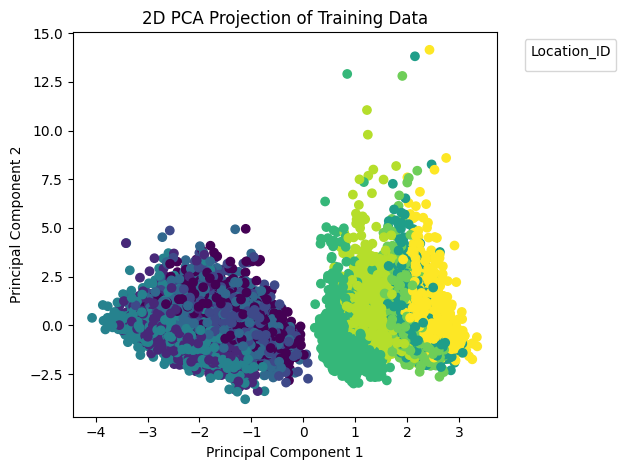

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap='viridis')
plt.title("2D PCA Projection of Training Data")
plt.legend(title="Location_ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()